# Worksheet 21: Python for Data Science

We can use Python for wrangling data and applying some machine learning algorithms.

### 1. Set up

In [1]:
#Run this first
#It allows you to have multiple outputs from a single chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Call packages:

In [2]:
import numpy as np # arrays
import matplotlib.pyplot as plt # visualization
import pandas as pd # data manipulation
import seaborn as sns # more data manipulation

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### 2. Data wrangling with pandas

The `pandas` package contains functions for data wrangling that are similar to `dplyr` in R.

| dplyr     | pandas      |
|-----------|-------------|
| select    | filter      |
| filter    | query       |
| arrange   | sort_values |
| group_by  | groupby     |
| mutate    | assign      |
| summarize | agg         |

Instead of pipes in Python, we can do a chain wrapped in parentheses.

In [3]:
# Load dataset from library
iris = sns.load_dataset('iris')

# Take a look
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# An example of data wrangling with Python
(iris.filter(['species', 'petal_length', 'petal_width']) # keep some variables
.query('species == "setosa"') # keep some observations
.agg(['mean'])) # calculate the mean

/var/folders/cm/tp384c9x4q78rhtw47g1d4800000gn/T/ipykernel_3885/506942225.py:4: FutureWarning: ['species'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(['mean'])) # calculate the mean


,petal_length,petal_width
mean,1.462,0.246


In [5]:
# Try it! Find the mean petal length and petal width for each species.
(iris.filter(['species', 'petal_length', 'petal_width'])
    .groupby("species")
    .agg(["mean"]))

,petal_length,petal_width
,mean,mean
species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


### 3. Machine Learning in Python

`Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It provides various tools for classification, model fitting, model selection and evaluation, and many other common tasks in Machine Learning. 

#### a. Clustering

When we are interested in finding how observations "naturally" group together, we are applying a clustering algorithm such as `KMeans`.

In [6]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [7]:
# import the dataset iris specifically formatted for machine learning (not a data frame)
iris_skl = datasets.load_iris()
type(iris_skl)

# Extract data (a numpy array object)
iris_data = iris_skl.data
type(iris_data)
iris_data.shape

# Take a look at a few rows
iris_data[0:6,]

sklearn.utils._bunch.Bunch

numpy.ndarray

(150, 4)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [8]:
# Apply k-means procedure to find 3 clusters
kmeans = KMeans(n_clusters = 3)

In [9]:
# Find the cluster assignment for each observation in the data
y_kmeans = kmeans.fit_predict(iris_data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Find the centers of the clusters
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 0, 'Petal Length (cm)')

Text(0, 0.5, 'Petal width (cm)')

Text(0.5, 1.0, 'Data colored by cluster')

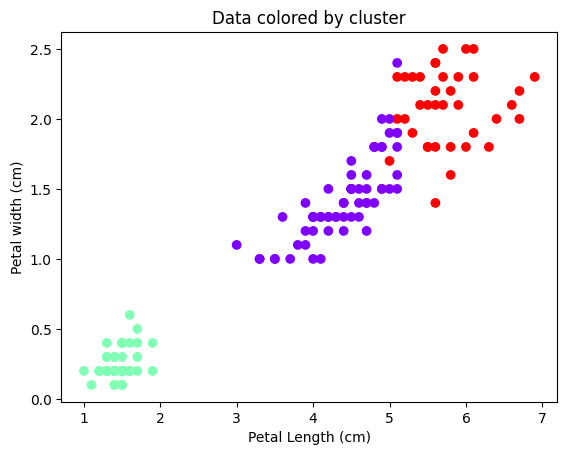

In [11]:
# Visualize the clusters (note: use variable positions for arrays)
plt.scatter(iris_data[:,2],iris_data[:,3],c = y_kmeans, cmap = "rainbow")
plt.xlabel('Petal Length (cm)') # label x-axis
plt.ylabel('Petal width (cm)') # label y-axis
plt.title('Data colored by cluster') # title

#### b. PCA

If we have a lot of variables in our data, it becomes difficult to visualize overall patterns in the data. PCA reduces the number of dimensions to a few principal components.

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Apply PCA to available numeric variables in the data
pca = PCA()
pcs = pca.fit_transform(iris_data)

# Variance explained by PC
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0.5, 0, 'PC1 92.5%')

Text(0, 0.5, 'PC2 5.3%')

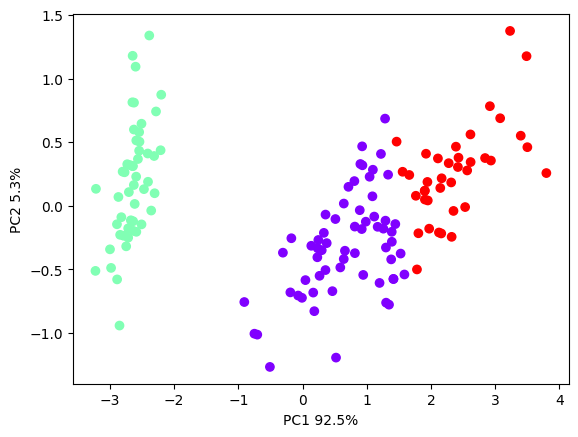

In [14]:
# Represent the clusters along PC1 and PC2
plt.scatter(pcs[:,0], pcs[:,1], c = y_kmeans, cmap = "rainbow")
plt.xlabel("PC1 92.5%")
plt.ylabel("PC2 5.3%")
plt.show()

#### c. K nearest neighbors

We can make predictions for some outcome variables that only have a few values. For example, we actually know that the iris flowers come from 3 different species. Can we predict from which species a flower is if we know its petal and sepal length/width? Let's try to use the `KNeighborsClassifier`:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [16]:
# Define outcome dataset
iris_outcome = iris_skl.target

In [17]:
# Fit a kNN model with 5 nearest neighbors
kNN = KNeighborsClassifier(n_neighbors = 5)
kNN.fit(iris_data, iris_outcome)

KNeighborsClassifier()

In [18]:
# Predict the class based on the nearest neighbors
y_pred = kNN.predict(iris_data)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
# Compute accuracy and print it
accuracy = accuracy_score(iris_outcome, y_pred) 
print("Accuracy : ", accuracy)

Accuracy :  0.9666666666666667


#### d. Cross-validation with `train_test_split`

Cross-validation is a method to validate our model: how well would our model predict the species of new flowers? Because we don't have data about new flowers, we split our current data into a train set (on which we fit the model) and a test set (on which we make predictions):

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix #ConfusionMatrixDisplay

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(iris_data, # data for predictors
                                                    iris_outcome, # data for outcome
                                                    random_state=0, # reproducible example
                                                    test_size=.5) # split in half

In [ ]:
# Fit a kNN classifier using the training sub-set
kNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

Text(0.5, 1.0, 'kNN Classifier')

[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
Accuracy: 0.96


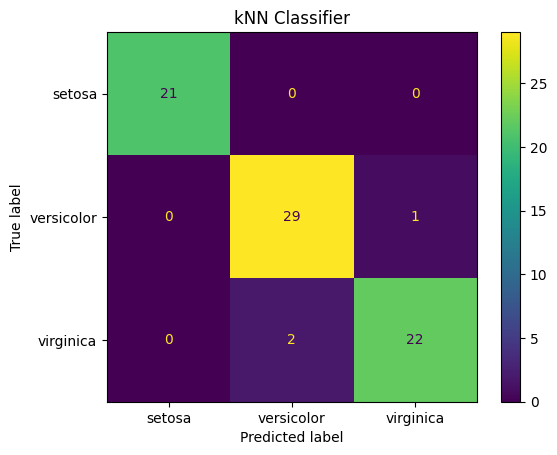

In [ ]:
# Plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(kNN, X_test, y_test,
                             display_labels=["setosa","versicolor","virginica"])
plt.title("kNN Classifier")

print(disp.confusion_matrix)
print("Accuracy:", kNN.score(X_test,y_test))

In [ ]:
# What if we consider the 10-fold cross-validation method instead:
CVten = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                        iris_data, iris_outcome, 
                        cv=10, scoring="accuracy")
CVten
CVten.mean() # great cv accuracy!

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

0.9666666666666668

#### e. Decision trees

Let's review one more classifier!

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [ ]:
# Specify and then fit a decision tree classifier to data
clf = DecisionTreeClassifier()
dtree = clf.fit(iris_data, iris_outcome)

<Figure size 2000x2000 with 0 Axes>

[Text(775.0, 1411.6666666666667, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(655.7692307692307, 1155.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(894.2307692307692, 1155.0, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(476.9230769230769, 898.3333333333333, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(238.46153846153845, 641.6666666666666, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(119.23076923076923, 385.0, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(357.6923076923077, 385.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(715.3846153846154, 641.6666666666666, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(596.1538461538462, 385.0, 'gini = 0.0\n

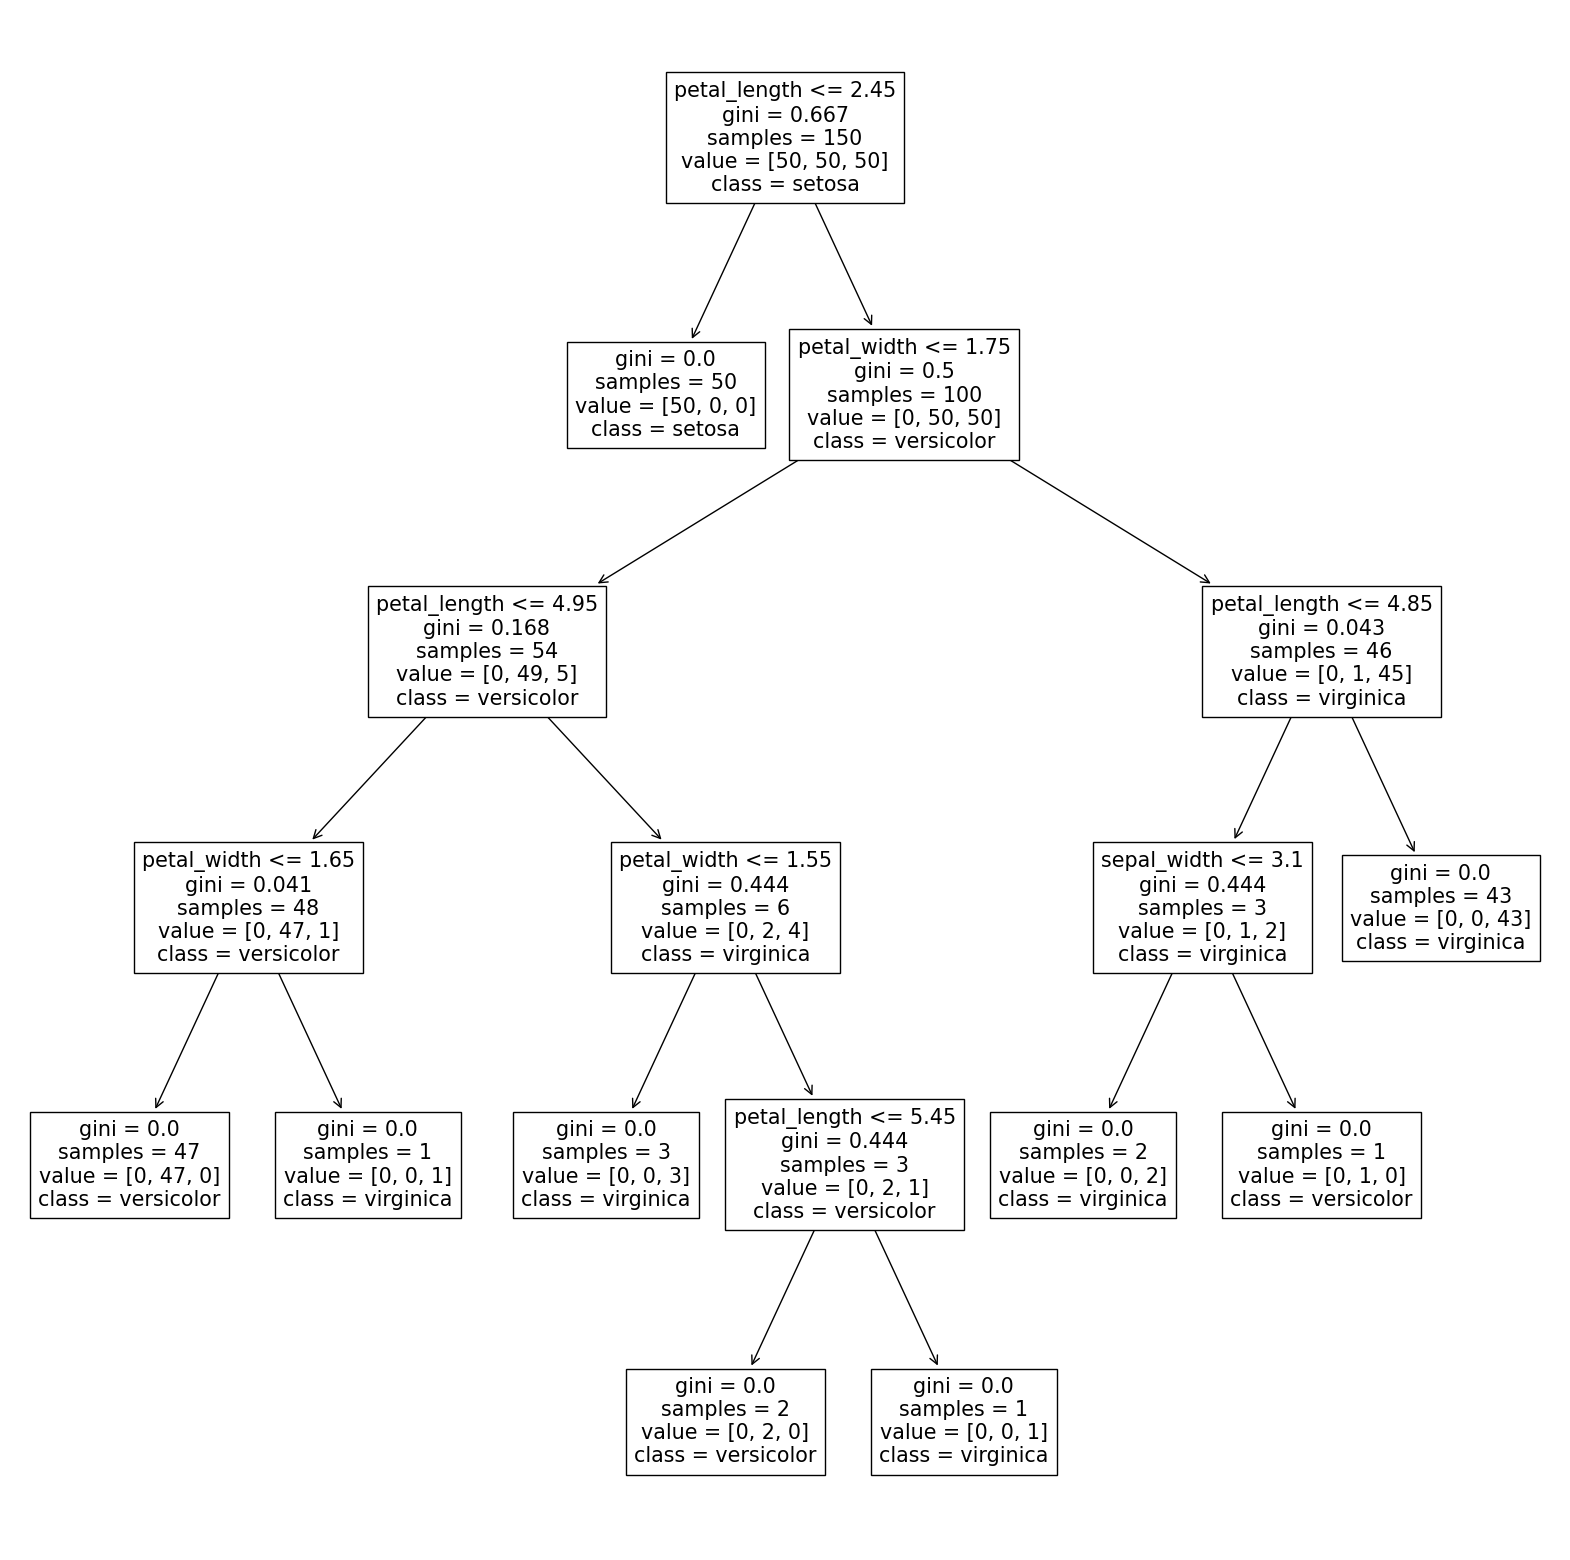

In [ ]:
# Once trained, you can plot the tree with the plot_tree function 
plt.figure(figsize=(20,20))
plot_tree(dtree, 
          feature_names=["sepal_length","sepal_width","petal_length","petal_width"],
          class_names=["setosa","versicolor","virginica"]) 

In [ ]:
# Let's test our model with the 10-fold cross-validation method:
CVten = cross_val_score(clf, 
                        iris_data, iris_outcome, 
                        cv=10, scoring="accuracy")
CVten
CVten.mean() # great cv accuracy, very similar to KNN

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

0.9533333333333334

See this page (https://scikit-learn.org/stable/index.html) for more examples of machine learning applications with `scikit-learn`!